In [1]:
import utils as ut
import optimal_binning as ob
import pandas as pd


In [2]:
# Generate dataset
generator = ut.SyntheticDatasetGenerator(n_samples=100_000)
generator.generate_dataset()
df = generator.fit_logistic_regression()

df.head()

,x1,x2,year,target,score
0,0.675420,0.256885,2015,0,0.059531
1,0.739593,0.195751,2018,0,0.061569
2,0.954391,0.863613,2021,0,0.201386
3,-0.254333,0.344584,2011,0,0.012118
4,0.692534,0.422148,2018,0,0.076202


[-inf, 0.0052, 0.0113, 0.0179, 0.0185, 0.0195, 0.0246, 0.0257, 0.027, 0.0279, 0.0294, 0.0308, 0.0323, 0.0365, 0.0379, 0.04, 0.043, 0.0449, 0.0469, 0.0501, 0.053, 0.057, 0.061, 0.0651, 0.0686, 0.0725, 0.0774, 0.0816, 0.0865, 0.0919, 0.102, 0.1092, 0.1168, 0.1252, 0.1362, 0.154, 0.1845, 0.2154, 0.2502, 0.3757, inf]


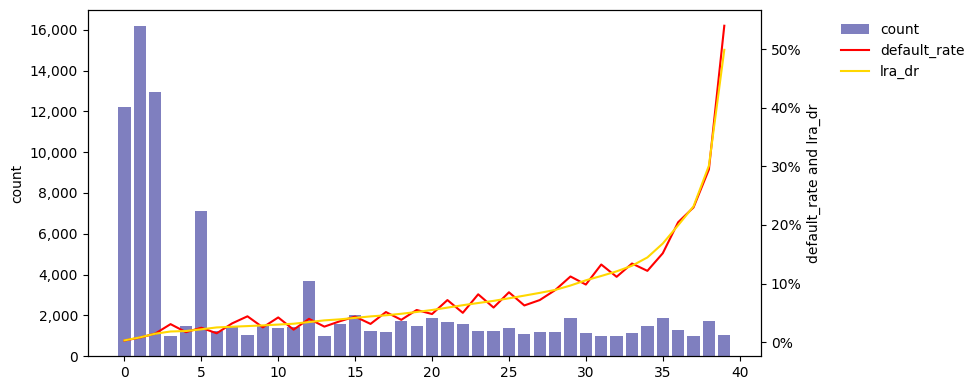

In [3]:
# Generate bins
optimal_binning = ob.BinningOptimizer()
df2, raw_df = optimal_binning.create_bins_with_decision_tree(
    df, 
    n_bins=40, 
    min_samples_leaf=1000
)

# Get input data per bin
stats_combined = df2  
ut.plot_stats(df2)

In [4]:
# Test solution
events = df2['events']
non_events = df2['non_events']
lra_drs = df2['lra_dr']

bins, _, _, iv, bin_data, excluded = optimal_binning.create_pools(events, non_events, lra_drs, 5, 15)

Total IV = 1.65, optimal solution


In [5]:
def add_mapped_column(df, bin_col, mapping_dict):
    # Define a function to map the old bin number using the dictionary
    def map_bin_number(bin_number):
        for key, value in mapping_dict.items():
            if value[0] <= bin_number <= value[1]:
                return key
        return None  # If no match is found, return None

    # Apply the mapping function to the specified column to create the new column
    df['new_bin'] = df[bin_col].apply(map_bin_number)
    return df

# Creating a dictionary where the key is the element number
mapping_dict = {index: pair for index, pair in enumerate(bins)}

# Add the new column using the mapping dictionary
df_final = add_mapped_column(raw_df, 'bins', mapping_dict)
df_final.head()

,x1,x2,year,target,score,bins,new_bin
0,0.675420,0.256885,2015,0,0.059531,21,7
1,0.739593,0.195751,2018,0,0.061569,22,7
2,0.954391,0.863613,2021,0,0.201386,36,12
3,-0.254333,0.344584,2011,0,0.012118,2,2
4,0.692534,0.422148,2018,0,0.076202,25,8


In [6]:
mapping_dict

{0: [0, 0],
 1: [1, 1],
 2: [2, 2],
 3: [3, 6],
 4: [7, 11],
 5: [12, 16],
 6: [17, 20],
 7: [21, 22],
 8: [23, 27],
 9: [28, 30],
 10: [31, 34],
 11: [35, 35],
 12: [36, 37],
 13: [38, 38],
 14: [39, 39]}

In [7]:
drs = df_final.pivot_table(index='year', columns='new_bin', values='target', aggfunc='mean', margins='all').T
drs.style.format("{:.2%}")

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,All
new_bin,,,,,,,,,,,,,,
0,0.34%,0.51%,0.10%,0.21%,0.31%,0.32%,0.12%,0.10%,0.21%,0.42%,0.10%,0.53%,0.34%,0.28%
1,0.70%,0.66%,0.67%,1.03%,0.66%,0.82%,0.56%,0.79%,0.88%,1.13%,0.93%,0.62%,0.62%,0.77%
2,1.19%,1.54%,1.22%,1.54%,0.83%,1.70%,1.14%,1.49%,1.63%,1.16%,1.88%,2.12%,1.53%,1.46%
3,3.03%,2.06%,2.90%,2.29%,1.71%,2.83%,3.04%,1.99%,1.85%,2.01%,2.14%,2.47%,1.69%,2.31%
4,3.03%,4.06%,2.53%,3.04%,2.95%,3.95%,2.34%,3.00%,3.29%,3.12%,3.44%,4.77%,2.24%,3.22%
5,3.73%,3.58%,3.17%,3.85%,2.84%,3.62%,4.64%,5.05%,2.92%,4.62%,4.21%,2.98%,3.32%,3.74%
6,5.24%,5.41%,5.35%,3.57%,5.36%,3.65%,5.74%,4.18%,4.13%,4.26%,4.03%,5.38%,5.69%,4.76%
7,6.79%,6.02%,4.71%,7.23%,4.56%,5.63%,9.72%,5.60%,5.22%,4.51%,6.54%,7.85%,5.47%,6.12%
8,6.96%,7.36%,5.97%,6.99%,8.70%,6.49%,7.43%,8.14%,6.71%,7.96%,7.77%,6.79%,7.19%,7.26%


In [12]:
drs = df_final.pivot_table(index='year', columns='new_bin', values='target', aggfunc='count', margins='all').T
drs.style.format("{:,.0f}")

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,All
new_bin,,,,,,,,,,,,,,
0,879,983,954,959,961,930,851,984,956,952,957,952,877,"12,195"
1,"1,281","1,212","1,200","1,258","1,221","1,216","1,250","1,269","1,252","1,235","1,184","1,295","1,285","16,158"
2,"1,010",974,982,"1,037",962,"1,000",968,"1,005",983,"1,037",960,989,"1,044","12,951"
3,858,872,828,829,821,814,823,805,812,847,840,850,829,"10,828"
4,528,517,514,526,543,532,556,566,517,545,523,545,490,"6,902"
5,723,698,726,701,739,746,754,772,719,736,736,739,753,"9,542"
6,439,444,505,448,485,520,488,478,508,470,496,483,492,"6,256"
7,221,249,276,249,241,231,247,250,249,244,260,242,274,"3,233"
8,503,435,486,472,471,493,471,442,447,465,502,486,459,"6,132"


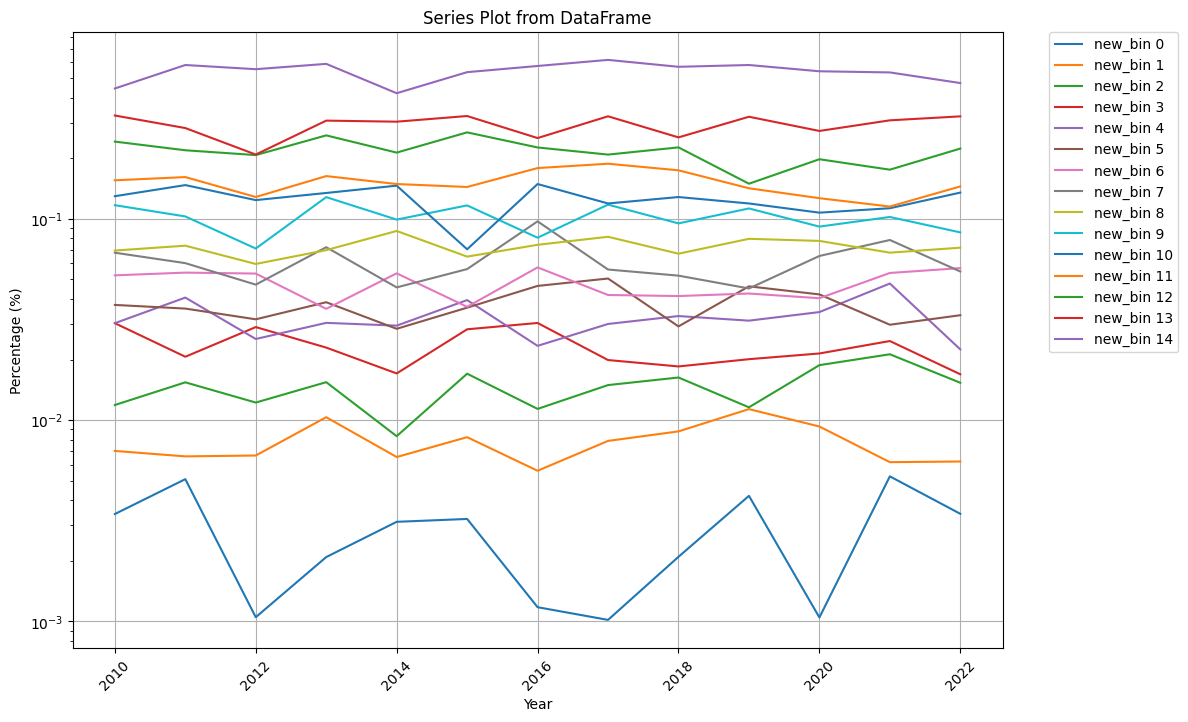

In [9]:
# Sample DataFrame based on your given data
data = {
    'year': ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', 'All'],
    '0': ['0.34%', '0.51%', '0.10%', '0.21%', '0.31%', '0.32%', '0.12%', '0.10%', '0.21%', '0.42%', '0.10%', '0.53%', '0.34%', '0.28%'],
    '1': ['0.70%', '0.66%', '0.67%', '1.03%', '0.66%', '0.82%', '0.56%', '0.79%', '0.88%', '1.13%', '0.93%', '0.62%', '0.62%', '0.77%'],
    # ... (rest of your data for rows 2, 3, 4, etc.)
}

# Convert to DataFrame
drs = df_final.pivot_table(index='year', columns='new_bin', values='target', aggfunc='mean').T


df = drs.T

# Remove '%' and convert values to floats
# df = drs.T.set_index('year').apply(lambda col: col.str.rstrip('%').astype(float))

# Plotting the DataFrame
plt.figure(figsize=(12, 8))

for row in df.columns:
    plt.plot(df.index, df[row], label=f'new_bin {row}')

# Set y-axis to logarithmic scale
plt.yscale('log')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.title('Series Plot from DataFrame')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)

# Show plot
plt.show()


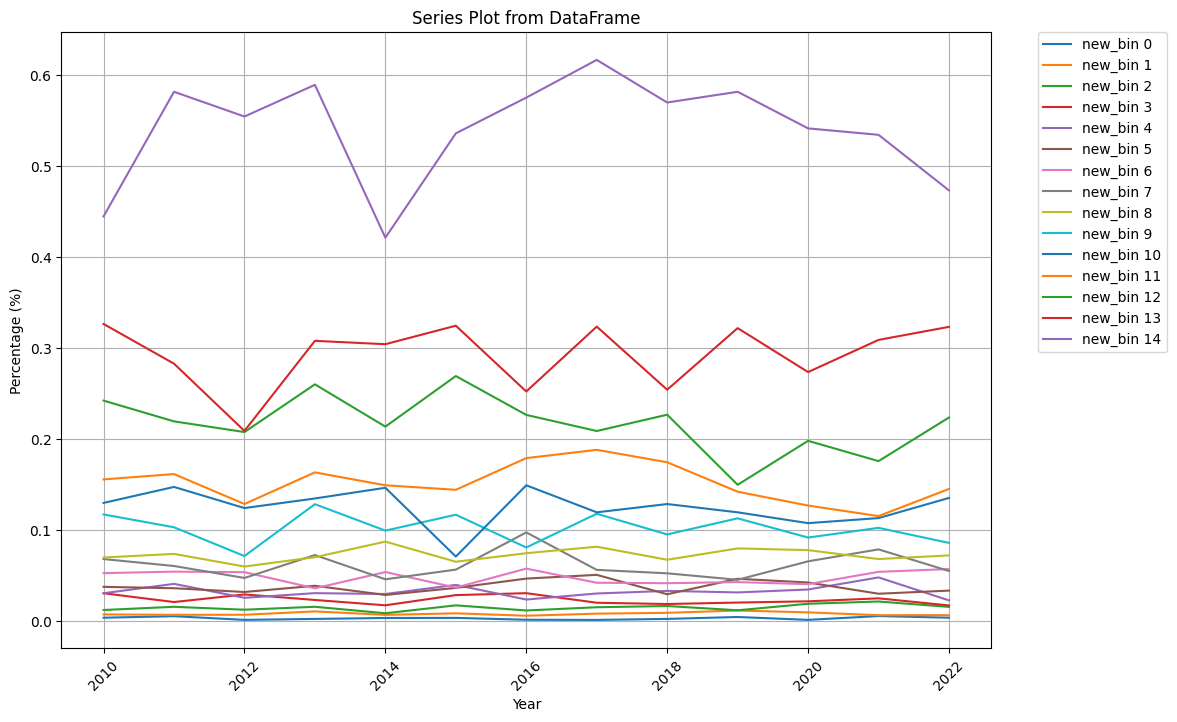

In [10]:
# Plotting the DataFrame
plt.figure(figsize=(12, 8))

for row in df.columns:
    plt.plot(df.index, df[row], label=f'new_bin {row}')

# Set y-axis to logarithmic scale
# plt.yscale('log')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.title('Series Plot from DataFrame')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)

# Show plot
plt.show()